# Predição de regiões promotores (Bacillus subtilis) com SVM

# Importação das bibliotecas e módulos do Python

In [66]:
import numpy as np
import re
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

# Importação do conjunto de dados

In [67]:
atributos = ['Sequencia', 'Classe']
df = pd.read_csv('promotores_bd.csv', names=atributos)
X = df[df.columns.difference(['Classe'])].values
y = df['Classe'].values
class_names = df['Classe'].unique()

# Análise dos dados

In [68]:
# Dimensão do dataset (linhas; colunas):

print("O conjunto de dados possui como linhas;colunas:", df.shape)

O conjunto de dados possui como linhas;colunas: (540, 2)


In [69]:
# Impressão de apenas as duas primeiras linhas

print(df.head(2)) 

                                           Sequencia Classe
0  CGCTCTATCCTGGGTTTTTGGCTGTGCCAAAAGGGAATAATGAAAA...      +
1  GTTTCCCTTATTTTTTGATAAAAGGCTTCCGAAGAAACGTAACTGT...      +


In [70]:
# Observação das colunas(atributos) presentes no conjunto de dados e análise da quantidade de instâncias,a presença de valores nulos e os tipos dos dados em cada atributo:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sequencia  540 non-null    object
 1   Classe     540 non-null    object
dtypes: object(2)
memory usage: 8.6+ KB


# Análise dos dados: distribuição das instâncias em relação às classes

Distribuição das instâncias entre as classes:
+    0.5
-    0.5
Name: Classe, dtype: float64


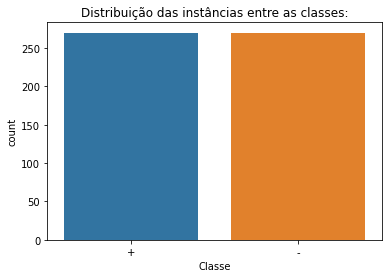

<Figure size 432x288 with 0 Axes>

In [71]:
print("Distribuição das instâncias entre as classes:")
print(df.Classe.value_counts() / df.shape[0])

fig, ax = plt.subplots()
sb.countplot('Classe', data=df, ax=ax)
ax.set_title("Distribuição das instâncias entre as classes:")
plt.show()
plt.savefig("distr_classes.png")

# Análise dos dados: distribuição das instâncias em relação aos atributos

In [72]:
# Definição para a contagem da frequência para uma única amostra:

def count_freq(seq):
    count = collections.Counter(seq)
    return count

In [73]:
# Avaliação da frequência de bases em cada instância a partir da construção de uma matriz, em que:
# colunas = freq. de A, T, C, G
# linhas = cada uma das instâncias do conjunto de dados

seqs = df["Sequencia"].values
freqs = []
for seq in seqs:
    c = count_freq(seq)
    linha = [c['A'], c['T'], c['C'], c['G']]
    freqs.append(linha)

# Transformação para um array numpy e visualização das primeiras linhas:

freqs = np.asarray(freqs)
freqs[:10]

array([[26, 27, 11, 17],
       [24, 27, 10, 20],
       [27, 32,  6, 16],
       [23, 33,  9, 16],
       [27, 32, 11, 11],
       [29, 30, 12, 10],
       [37, 19, 12, 13],
       [28, 27, 15, 11],
       [25, 28, 14, 14],
       [35, 26,  9, 11]])

In [74]:
# Conversão dos valores dos rótulos de classe para a construção dos gráficos:

novo_y = LabelEncoder().fit_transform(y)
print("antes:", df["Classe"].values[265:275])
print("depois:", novo_y[265:275])

antes: ['+' '+' '+' '+' '+' '-' '-' '-' '-' '-']
depois: [0 0 0 0 0 1 1 1 1 1]


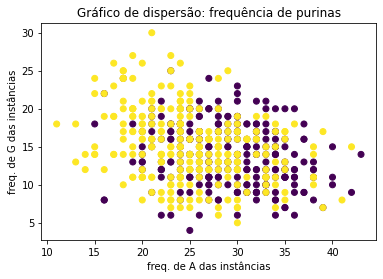

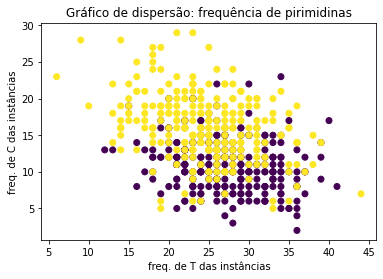

In [75]:
# Construção do gráfico de dispersão para as purinas (bases A e G):

ya = freqs[:, 0]  # seleção de todas as linhas da primeira coluna ("A")
yg = freqs[:, 3]  # seleção de todas as linhas da última coluna ("G")

plt.scatter(ya, yg, c=novo_y)
plt.title("Gráfico de dispersão: frequência de purinas")
plt.xlabel("freq. de A das instâncias")
plt.ylabel("freq. de G das instâncias")
plt.show()

# Construção do gráfico de dispersão para as pirimidinas (bases T e C):

yt = freqs[:, 1]  # seleção de todas as linhas da primeira coluna ("T")
yc = freqs[:, 2]  # seleção de todas as linhas da última coluna ("C")

plt.scatter(yt, yc, c=novo_y)
plt.title("Gráfico de dispersão: frequência de pirimidinas")
plt.xlabel("freq. de T das instâncias")
plt.ylabel("freq. de C das instâncias")
plt.show()

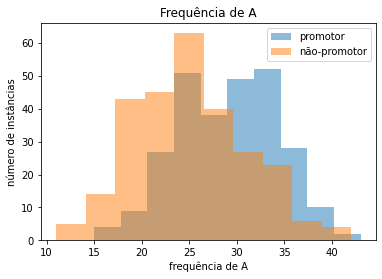

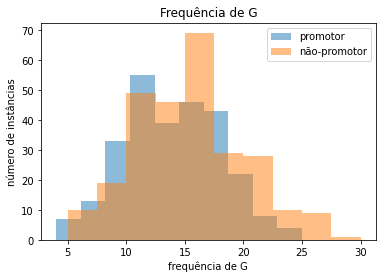

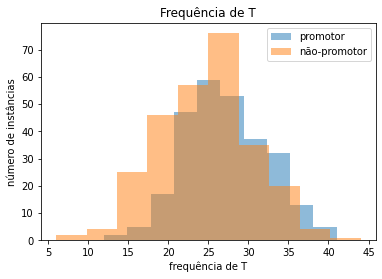

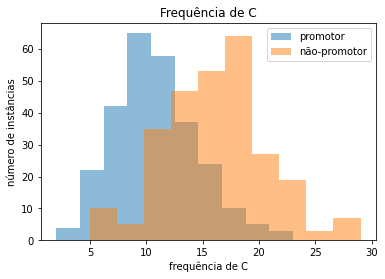

In [76]:
# Construção do histograma a partir da seleção de apenas amostras da classe '+' e '-':

prmt = np.where(df["Classe"].values == '+')[0]
notprmt = np.where(df["Classe"].values == '-')[0]

# Considerando apenas a base ("A"):
y_prmt = freqs[:, 0][prmt]
y_notprmt = freqs[:, 0][notprmt]

plt.hist(y_prmt, alpha=0.5, label='promotor')
plt.hist(y_notprmt, alpha=0.5, label='não-promotor')
plt.title("Frequência de A")
plt.legend(loc='upper right')
plt.xlabel("frequência de A")
plt.ylabel("número de instâncias")
plt.show()


# Considerando apenas a base ("G"):
y_prmt = freqs[:, 3][prmt]
y_notprmt = freqs[:, 3][notprmt]

plt.hist(y_prmt, alpha=0.5, label='promotor')
plt.hist(y_notprmt, alpha=0.5, label='não-promotor')
plt.title("Frequência de G")
plt.legend(loc='upper right')
plt.xlabel("frequência de G")
plt.ylabel("número de instâncias")
plt.show()

# Considerando apenas a base ("T"):
y_prmt = freqs[:, 1][prmt]
y_notprmt = freqs[:, 1][notprmt]

plt.hist(y_prmt, alpha=0.5, label='promotor')
plt.hist(y_notprmt, alpha=0.5, label='não-promotor')
plt.title("Frequência de T")
plt.legend(loc='upper right')
plt.xlabel("frequência de T")
plt.ylabel("número de instâncias")
plt.show()


# Considerando apenas a base ("C"):
y_prmt = freqs[:, 2][prmt]
y_notprmt = freqs[:, 2][notprmt]

plt.hist(y_prmt, alpha=0.5, label='promotor')
plt.hist(y_notprmt, alpha=0.5, label='não-promotor')
plt.title("Frequência de C")
plt.legend(loc='upper right')
plt.xlabel("frequência de C")
plt.ylabel("número de instâncias")
plt.show()

In [77]:
# Função para a criação de um array NumPy a partir de uma sequência de caracteres
def string_to_array(string):
    string = string[0]
    seq_array = []
    for i in range(0, len(string)):
        if(string[i] == 'a' or string[i] == 'A'):
            seq_array.append(0.25)
        elif(string[i] == 'c' or string[i] == 'C'):
            seq_array.append(0.5)
        elif(string[i] == 'g' or string[i] == 'G'):
            seq_array.append(0.75)
        elif(string[i] == 't' or string[i] == 'T'):
            seq_array.append(1.0)
        else:
            seq_array.append(0.0)
    return seq_array

# Função para a conversão de array em um objeto de matriz NumPy a partir de uma sequência de caracteres
def create_matrix(X):
    linhas_em_arrays = []
    for i in range(0,X.shape[0]):
        linhas_em_arrays.append(string_to_array(X[i]))
    return np.asarray(linhas_em_arrays) 

In [78]:
novo_X = create_matrix (X)
print(novo_X.shape)

(540, 81)


# Construção e treinamento de SVM

# Conjunto de treinamento = 80% dos dados
Divisão do conjunto de dados em conjunto de treinamento (80%) e conjunto de teste (20%):

In [79]:
# Para o processo pseudo-aleatório de divisão dos grupos, a semente foi fixada em 0.

X_train, X_test, Y_train, Y_test = train_test_split(novo_X, novo_y, test_size = 0.2, random_state = 0)

Verificação da divisão do conjunto de dados:

In [80]:
print("(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: ")
X_train.shape, X_test.shape

(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: 


((432, 81), (108, 81))

In [81]:
print("(Quantidade de rótulos) dos conjuntos de treinamento e teste: ")
Y_train.shape, Y_test.shape

(Quantidade de rótulos) dos conjuntos de treinamento e teste: 


((432,), (108,))

Fase de construção e predição da SVM:

In [82]:
# Parâmetro de regularização da SVM:

C = 1.0  
#fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

for degree in range(1,5):
    clf = svm.SVC(kernel = 'poly', C=C, degree = degree).fit(X_train, Y_train)
    clf.predict(X_train)    
    print ("Acurácia do classificador construído com o expoente = %d da função Kernel polinomial:" %degree,clf.score(X_train,Y_train))
    clf.predict(X_test)
    print ("Acurácia do classificador construído com o expoente = %d da função Kernel polinomial utilizando conj. de teste:" %degree,clf.score(X_test,Y_test), "\n")

#title = 'Linear SVC, C = {:.3f}'.format(C)
#plot_class_regions_for_classifier_subplot(clf, X_train, Y_train, None, None, title, subaxes)

Acurácia do classificador construído com o expoente = 1 da função Kernel polinomial: 0.8171296296296297
Acurácia do classificador construído com o expoente = 1 da função Kernel polinomial utilizando conj. de teste: 0.6481481481481481 

Acurácia do classificador construído com o expoente = 2 da função Kernel polinomial: 0.9768518518518519
Acurácia do classificador construído com o expoente = 2 da função Kernel polinomial utilizando conj. de teste: 0.6666666666666666 

Acurácia do classificador construído com o expoente = 3 da função Kernel polinomial: 1.0
Acurácia do classificador construído com o expoente = 3 da função Kernel polinomial utilizando conj. de teste: 0.6666666666666666 

Acurácia do classificador construído com o expoente = 4 da função Kernel polinomial: 1.0
Acurácia do classificador construído com o expoente = 4 da função Kernel polinomial utilizando conj. de teste: 0.6851851851851852 



# Aprimoramento dos parâmetros

In [83]:
# Busca pelos parâmetros mais adequados para a classificação pela SVM:

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9]}]
search = GridSearchCV(svm.SVC(), parameters, n_jobs=-1, verbose=1)
search.fit(X_train, Y_train)

Fitting 5 folds for each of 76 candidates, totalling 380 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 373 out of 380 | elapsed:  1.3min remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 380 out of 380 | elapsed:  1.8min finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000],
                          'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'kernel': ['poly']}],
             verbose=1)

In [54]:
melhores_parametros = search.best_estimator_
print ("Os parâmetros mais adequados foram:", melhores_parametros)

Os parâmetros mais adequados foram: SVC(C=1, gamma=0.2)


# Predição pela SVM

In [57]:
clf2 = svm.SVC(kernel = 'rbf', C=1, gamma = 0.2).fit(X_train, Y_train)
clf2.predict(X_train)    
print ("Acurácia no treinamento do classificador construído com os parâmetros mais adequados:", clf2.score(X_train,Y_train), "\n")


clf2.predict(X_test)
print ("Acurácia no teste do classificador construído com os parâmetros mais adequados:",clf2.score(X_test,Y_test))

Acurácia no treinamento do classificador construído com os parâmetros mais adequados: 1.0 

Acurácia no teste do classificador construído com os parâmetros mais adequados: 0.75


[[38 12]
 [15 43]]


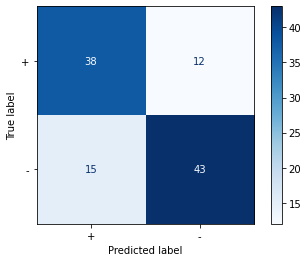

In [61]:
disp = plot_confusion_matrix (clf2, X_test, Y_test, display_labels=class_names,cmap=plt.cm.Blues)

print(disp.confusion_matrix)
plt.show()